In [61]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns
from scipy.stats import norm
matplotlib.rcParams['figure.figsize'] = (10,6)
from collections import Counter
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
dataset=pd.read_csv("insurance2.csv")

# Exploratory Data Analysis

In [2]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [8]:
dataset.shape 

(1338, 8)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   children        1338 non-null   int64  
 4   smoker          1338 non-null   int64  
 5   region          1338 non-null   int64  
 6   charges         1338 non-null   float64
 7   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


In [11]:
dataset.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

In [12]:
dataset.corr()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008,0.113723
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292,0.031565
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341,0.384198
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998,-0.409526
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251,0.333261
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208,0.020891
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000,0.309418
insuranceclaim,0.113723,0.031565,0.384198,-0.409526,0.333261,0.020891,0.309418,1.000000


<AxesSubplot:>

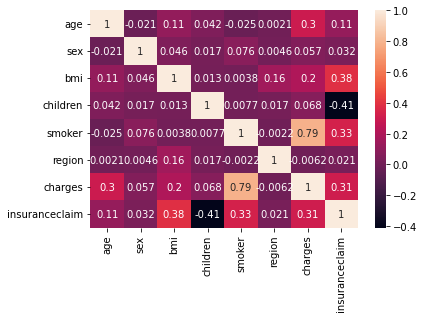

In [18]:
sns.heatmap(data = dataset.corr(), annot = True)

## Check Distribution & Outlier

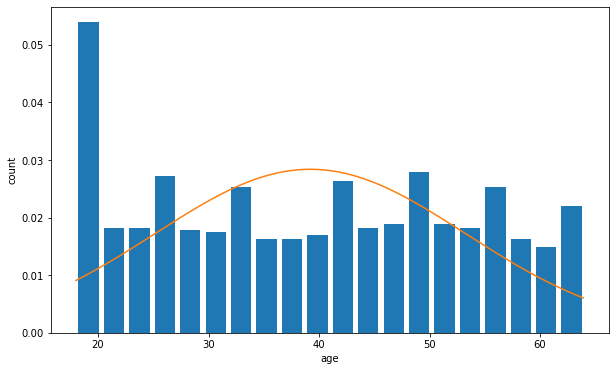

In [34]:
plt.hist(dataset['age'], bins = 20, rwidth = 0.8, density = True)
plt.xlabel('age')
plt.ylabel('count')

rng = np.arange(dataset["age"].min(), dataset["age"].max(), 0.1)
plt.plot(rng, norm.pdf(rng,dataset["age"].mean(),dataset["age"].std()))

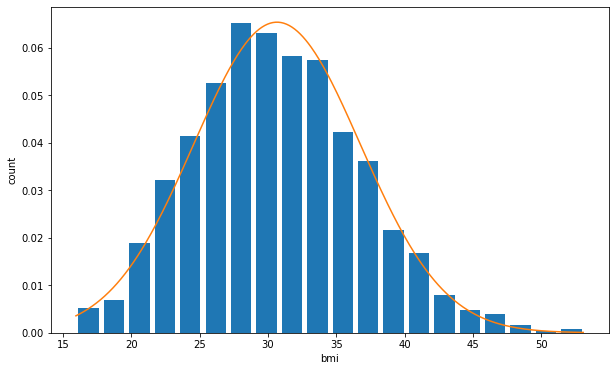

In [35]:
plt.hist(dataset['bmi'], bins = 20, rwidth = 0.8, density = True)
plt.xlabel('bmi')
plt.ylabel('count')

rng = np.arange(dataset["bmi"].min(), dataset["bmi"].max(), 0.1)
plt.plot(rng, norm.pdf(rng,dataset["bmi"].mean(),dataset["bmi"].std()))

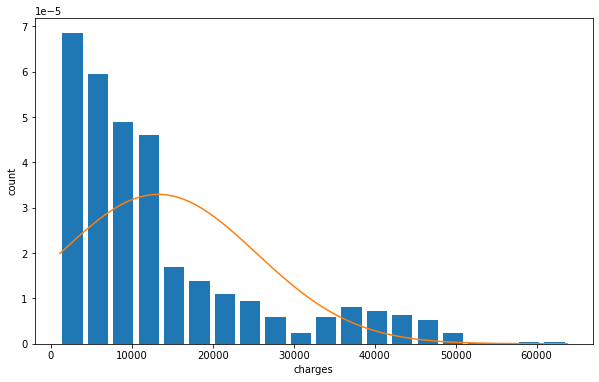

In [36]:
plt.hist(dataset['charges'], bins = 20, rwidth = 0.8, density = True)
plt.xlabel('charges')
plt.ylabel('count')

rng = np.arange(dataset["charges"].min(), dataset["charges"].max(), 0.1)
plt.plot(rng, norm.pdf(rng,dataset["charges"].mean(),dataset["charges"].std()))



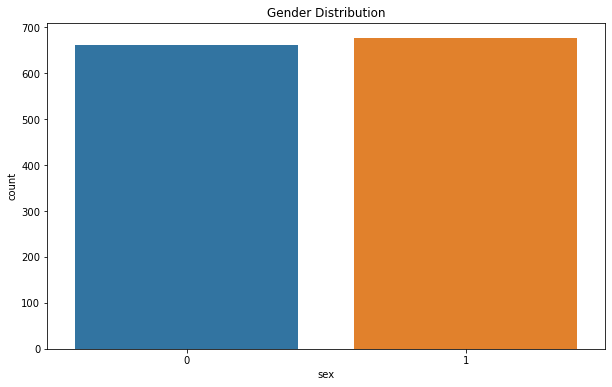

In [38]:
plt.title('Gender Distribution')
sns.countplot(x= 'sex', data= dataset,saturation = .75)
plt.show()

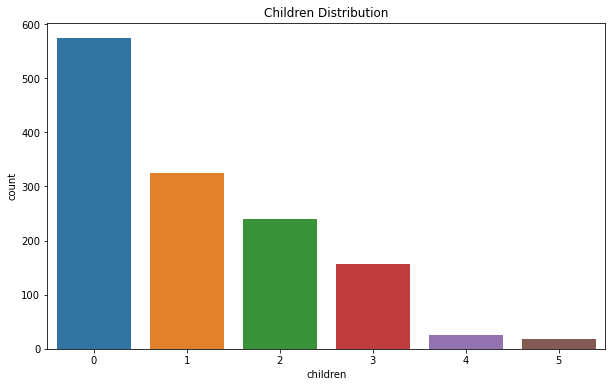

In [39]:
plt.title('Children Distribution')
sns.countplot(x= 'children', data= dataset,saturation = .75)
plt.show()

In [41]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


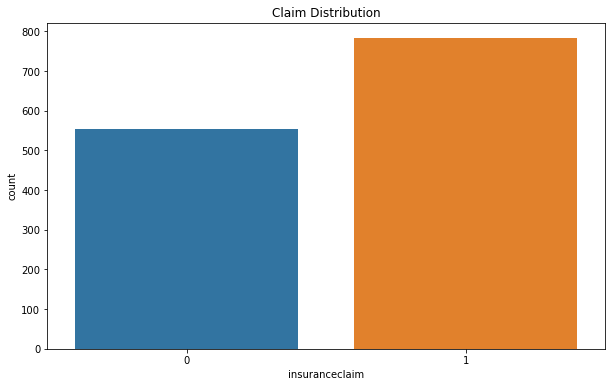

In [42]:
plt.title('Claim Distribution')
sns.countplot(x= 'insuranceclaim', data= dataset,saturation = .75)
plt.show()

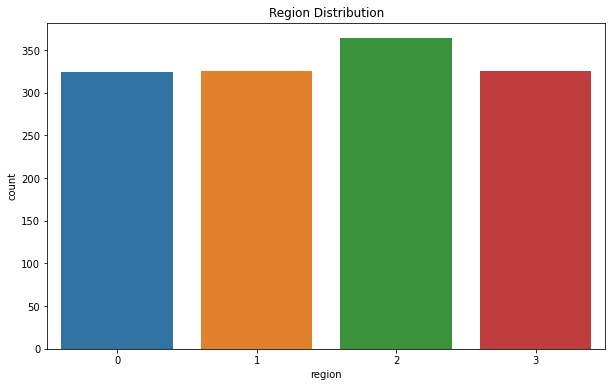

In [43]:
plt.title('Region Distribution')
sns.countplot(x= 'region', data= dataset,saturation = .75)
plt.show()

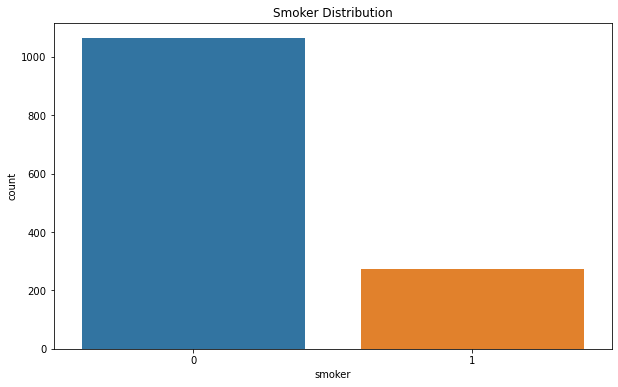

In [44]:
plt.title('Smoker Distribution')
sns.countplot(x= 'smoker', data= dataset,saturation = .75)
plt.show()

## Check data balance

In [46]:
dataset['insuranceclaim'].value_counts()

1    783
0    555
Name: insuranceclaim, dtype: int64

In [60]:
print(Counter(y))

Counter({1: 783, 0: 555})


In [48]:
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values


In [57]:
from imblearn.over_sampling import SMOTE
s1 = SMOTE()
x_data , y_data = s1.fit_resample(x,y)

In [59]:
print(Counter(y_data))

Counter({1: 783, 0: 783})


## Standardization 

In [65]:
sd = StandardScaler()
x_data = sd.fit_transform(x_data)

In [66]:
x_data

array([[-1.42825517, -1.01100531, -0.39063036, ...,  2.111703  ,
         1.38511339,  0.36626024],
       [-1.5006055 ,  1.02823038,  0.58782002, ..., -0.48021753,
         0.45764324, -0.94291433],
       [-0.77710213,  1.02823038,  0.45947133, ..., -0.48021753,
         0.45764324, -0.70767547],
       ...,
       [ 0.82125507,  1.02823038,  0.30751365, ..., -0.48021753,
        -0.6697277 , -0.16829849],
       [-0.65278299,  1.02823038,  0.6966684 , ...,  0.88875872,
         0.07229037,  0.61173787],
       [ 0.32899204, -1.01100531, -0.59998212, ...,  2.05837781,
         1.36603197,  0.84882581]])

In [ ]:
# standardize dataset so that the mean of dataset = 0 and variance of dataset = 1

In [70]:
round(x_data.mean(),1)

0.0

In [71]:
round(x_data.var(),1)

1.0

## Split Dataset

In [82]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data)

# categorical features are transfered as numerical in dataset: label encoding/one hot encoding

# Logistic Regression

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression()
lr.fit(x_train, y_train)

y_log_train_pred = lr.predict(x_train)

logistic_train_ac = accuracy_score(y_log_train_pred, y_train)*100


y_log_test_pred = lr.predict(x_test)

logistic_test_ac = accuracy_score(y_log_test_pred, y_test)*100
logistic_train_ac, logistic_test_ac


(89.18228279386712, 89.03061224489795)

# Naives Bayes

In [101]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)

y_nb_train_pred = nb.predict(x_train)
nb_train_ac =accuracy_score(y_nb_train_pred,y_train)*100

y_nb_test_pred = nb.predict(x_test)
nb_test_ac =accuracy_score(y_nb_test_pred,y_test)*100

nb_train_ac,nb_test_ac

(73.1686541737649, 72.95918367346938)

# Decision Tree Classifier

In [97]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'gini', max_depth = 5) # use gini index 
dt.fit(x_train, y_train)

y_dt_train_pred = dt.predict(x_train)
dt_train_ac = accuracy_score(y_dt_train_pred, y_train)

y_dt_test_pred = dt.predict(x_test)
dt_test_ac = accuracy_score(y_dt_test_pred, y_test)

dt_train_ac, dt_test_ac

(0.9378194207836457, 0.9183673469387755)

# Cross Validation Score

In [99]:
from sklearn.model_selection import cross_val_score
cross_val_score(lr,x_train,y_train,cv=5)

array([0.89361702, 0.87234043, 0.89361702, 0.88085106, 0.89316239])

In [102]:
cross_val_score(nb,x_train,y_train,cv=5)

array([0.74468085, 0.70638298, 0.70638298, 0.77021277, 0.72222222])

In [103]:
cross_val_score(dt,x_train,y_train,cv=5)

array([0.92765957, 0.89787234, 0.93191489, 0.94042553, 0.88888889])

In [ ]:
search youtube for similar ecommerce project and learn ab test part

# K Fold Cross Validation Score

In [109]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=5)
kf.get_n_splits(x)

scores=cross_val_score(lr,x_data,y_data,cv=kf)
print(scores)
print("Logistic Regression 5 folds cross validation score", np.mean(scores)*100)

[0.85987261 0.88178914 0.87539936 0.89456869 0.89456869]
Logistic Regression 5 folds cross validation score 88.12396980118434


In [110]:
scores=cross_val_score(nb,x_data,y_data,cv=kf)
print(scores)
print("Naive Bayes 5 folds cross validation score", np.mean(scores)*100)

[0.66242038 0.66134185 0.71884984 0.7028754  0.83386581]
Naive Bayes 5 folds cross validation score 71.58706579027697


In [111]:
scores=cross_val_score(dt,x_data,y_data,cv=kf)
print(scores)
print("Decision Tree 5 folds cross validation score", np.mean(scores)*100)

[0.9044586  0.90734824 0.93610224 0.9201278  0.82747604]
Decision Tree 5 folds cross validation score 89.91025823650313


In [114]:
for train_data,test_data in kf.split(x_data):
    x_train,x_test=x_data[train_data],x_data[test_data]
    y_train,y_test=y_data[train_data],y_data[test_data]
    
    scores=cross_val_score(lr,x_train,y_train,cv=kf)
    print(scores)
    print(np.mean(scores)*100)
    print("Y data Counter: ",Counter(y_test))
    
    
    ypred = lr.predict(x_test)
    
    print(ypred)

[0.88446215 0.88047809 0.9        0.852      0.924     ]
88.8188047808765
Y data Counter:  Counter({1: 190, 0: 124})
[1 0 0 0 1 0 1 0 0 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 1 1 0 0 1 1 0 0
 0 1 1 1 0 0 0 1 1 0 1 1 1 1 0 1 1 0 1 0 1 1 0 0 0 0 0 1 1 1 0 1 0 1 0 0 1
 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 0 1 0 0 1 1 1
 0 1 1 0 1 1 1 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 0 1 1
 1 0 0 1 0 1 0 1 1 1 1 0 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 1 0 0 0 0 1 1 0 1 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 1 1
 0 1 1 0 1 1 1 0 1 0 0 0 0 1 0 0 1 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 1 1 0
 1 1 1 0 1 0 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 1 1 1 0 1 0 1 1 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 1 0 1 0 1 1]
[0.84063745 0.85657371 0.90836653 0.84       0.904     ]
86.99155378486057
Y data Counter:  Counter({1: 191, 0: 122})
[1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 0 1 0 0 1 1 1 0 0 0 1 0 1 0
 1 1 1 1 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 1 0